In [1]:
"""
FEniCS tutorial demo program: Incompressible Navier-Stokes equations
for channel flow (Poisseuille) on the unit square using the
Incremental Pressure Correction Scheme (IPCS).

  u' + u . nabla(u)) - div(sigma(u, p)) = f
                                 div(u) = 0
"""

from __future__ import print_function
from fenics import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

T = 10.0           # final time
num_steps = 500    # number of time steps
dt = T / num_steps # time step size
mu = 1             # kinematic viscosity
rho = 1            # density

# Create mesh and define function spaces
mesh = UnitSquareMesh(16, 16)
V = VectorFunctionSpace(mesh, 'P', 2)
Q = FunctionSpace(mesh, 'P', 1)

# Define boundaries
inflow  = 'near(x[0], 0)'
outflow = 'near(x[0], 1)'
walls   = 'near(x[1], 0) || near(x[1], 1)'

# Define boundary conditions
bcu_noslip  = DirichletBC(V, Constant((0, 0)), walls)
bcp_inflow  = DirichletBC(Q, Constant(8), inflow)
bcp_outflow = DirichletBC(Q, Constant(0), outflow)
bcu = [bcu_noslip]
bcp = [bcp_inflow, bcp_outflow]

# Define trial and test functions
u = TrialFunction(V)
v = TestFunction(V)
p = TrialFunction(Q)
q = TestFunction(Q)

# Define functions for solutions at previous and current time steps
u_n = Function(V)
u_  = Function(V)
p_n = Function(Q)
p_  = Function(Q)

# Define expressions used in variational forms
U   = 0.5*(u_n + u)
n   = FacetNormal(mesh)
f   = Constant((0, 0))
k   = Constant(dt)
mu  = Constant(mu)
rho = Constant(rho)

# Define strain-rate tensor
def epsilon(u):
    return sym(nabla_grad(u))

# Define stress tensor
def sigma(u, p):
    return 2*mu*epsilon(u) - p*Identity(len(u))

In [2]:
# Define variational problem for step 1
F1 = rho*dot((u - u_n) / k, v)*dx + \
     rho*dot(dot(u_n, nabla_grad(u_n)), v)*dx \
   + inner(sigma(U, p_n), epsilon(v))*dx \
   + dot(p_n*n, v)*ds - dot(mu*nabla_grad(U)*n, v)*ds \
   - dot(f, v)*dx
a1 = lhs(F1)
L1 = rhs(F1)

# Define variational problem for step 2
a2 = dot(nabla_grad(p), nabla_grad(q))*dx
L2 = dot(nabla_grad(p_n), nabla_grad(q))*dx - (1/k)*div(u_)*q*dx

# Define variational problem for step 3
a3 = dot(u, v)*dx
L3 = dot(u_, v)*dx - k*dot(nabla_grad(p_ - p_n), v)*dx

# Assemble matrices
A1 = assemble(a1)
A2 = assemble(a2)
A3 = assemble(a3)

# Apply boundary conditions to matrices
[bc.apply(A1) for bc in bcu]
[bc.apply(A2) for bc in bcp]

[None, None]

<IPython.core.display.Javascript object>


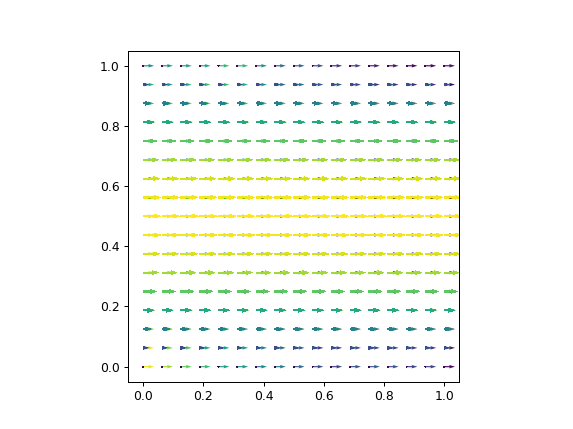

t = 0.02: error = 0.84
max u: 0.16000000000000342
t = 0.04: error = 0.684
max u: 0.31568816144455875
t = 0.06: error = 0.548
max u: 0.45196701833303393
t = 0.08: error = 0.444
max u: 0.5559329370127628
t = 0.10: error = 0.365
max u: 0.6348216978885606
t = 0.12: error = 0.3
max u: 0.7004586647377167
t = 0.14: error = 0.246
max u: 0.754470057841082
t = 0.16: error = 0.202
max u: 0.7984010777240691
t = 0.18: error = 0.165
max u: 0.8347367548032284
t = 0.20: error = 0.136
max u: 0.864370379847623
t = 0.22: error = 0.111
max u: 0.8887571330649249
t = 0.24: error = 0.0913
max u: 0.908746179289391
t = 0.26: error = 0.0749
max u: 0.9251289439389165
t = 0.28: error = 0.0614
max u: 0.9385959080817934
t = 0.30: error = 0.0504
max u: 0.9496145471152563
t = 0.32: error = 0.0413
max u: 0.958678413638838
t = 0.34: error = 0.0339
max u: 0.9660952072888659
t = 0.36: error = 0.0278
max u: 0.9721919158198927
t = 0.38: error = 0.0228
max u: 0.9771864377335554
t = 0.40: error = 0.0187
max u: 0.981286118545

t = 3.26: error = 5.19e-05
max u: 1.0000041103074802
t = 3.28: error = 5.13e-05
max u: 1.000001574721181
t = 3.30: error = 5.05e-05
max u: 1.0000040617156736
t = 3.32: error = 4.99e-05
max u: 1.000001549074381
t = 3.34: error = 4.91e-05
max u: 1.00000401334368
t = 3.36: error = 4.86e-05
max u: 1.0000015237166473
t = 3.38: error = 4.78e-05
max u: 1.0000039651995685
t = 3.40: error = 4.73e-05
max u: 1.0000014986473234
t = 3.42: error = 4.66e-05
max u: 1.0000039172910302
t = 3.44: error = 4.61e-05
max u: 1.0000014738656429
t = 3.46: error = 4.54e-05
max u: 1.0000038696254006
t = 3.48: error = 4.49e-05
max u: 1.0000014493707436
t = 3.50: error = 4.42e-05
max u: 1.0000038222096763
t = 3.52: error = 4.37e-05
max u: 1.0000014251616662
t = 3.54: error = 4.31e-05
max u: 1.0000037750505324
t = 3.56: error = 4.26e-05
max u: 1.0000014012373595
t = 3.58: error = 4.2e-05
max u: 1.000003728154339
t = 3.60: error = 4.15e-05
max u: 1.0000013775966883
t = 3.62: error = 4.09e-05
max u: 1.0000036815271733

t = 6.48: error = 1.04e-05
max u: 1.0000005391315094
t = 6.50: error = 1.03e-05
max u: 1.000001189527951
t = 6.52: error = 1.02e-05
max u: 1.0000005372497818
t = 6.54: error = 1.01e-05
max u: 1.0000011669505942
t = 6.56: error = 1.01e-05
max u: 1.0000005353483503
t = 6.58: error = 9.98e-06
max u: 1.0000011446661023
t = 6.60: error = 9.93e-06
max u: 1.0000005334277509
t = 6.62: error = 9.84e-06
max u: 1.0000011226721586
t = 6.64: error = 9.79e-06
max u: 1.0000005314885154
t = 6.66: error = 9.7e-06
max u: 1.000001100966427
t = 6.68: error = 9.65e-06
max u: 1.0000005295311678
t = 6.70: error = 9.56e-06
max u: 1.0000010795465584
t = 6.72: error = 9.52e-06
max u: 1.0000005275562296
t = 6.74: error = 9.43e-06
max u: 1.0000010584101915
t = 6.76: error = 9.38e-06
max u: 1.0000005255642128
t = 6.78: error = 9.29e-06
max u: 1.0000010375549462
t = 6.80: error = 9.25e-06
max u: 1.000000523555625
t = 6.82: error = 9.17e-06
max u: 1.0000010169784352
t = 6.84: error = 9.12e-06
max u: 1.00000052153096

t = 9.64: error = 3.91e-06
max u: 1.000000363571879
t = 9.66: error = 3.88e-06
max u: 1.0000002935887855
t = 9.68: error = 3.86e-06
max u: 1.000000361339968
t = 9.70: error = 3.83e-06
max u: 1.0000002905436476
t = 9.72: error = 3.82e-06
max u: 1.0000003591138937
t = 9.74: error = 3.79e-06
max u: 1.000000287529104
t = 9.76: error = 3.78e-06
max u: 1.000000356893796
t = 9.78: error = 3.75e-06
max u: 1.0000002845448883
t = 9.80: error = 3.74e-06
max u: 1.0000003546798104
t = 9.82: error = 3.71e-06
max u: 1.0000002815907343
t = 9.84: error = 3.7e-06
max u: 1.0000003524720693
t = 9.86: error = 3.67e-06
max u: 1.0000002786663758
t = 9.88: error = 3.66e-06
max u: 1.0000003502706987
t = 9.90: error = 3.63e-06
max u: 1.00000027577155
t = 9.92: error = 3.62e-06
max u: 1.000000348075826
t = 9.94: error = 3.6e-06
max u: 1.0000002729059945
t = 9.96: error = 3.58e-06
max u: 1.000000345887572
t = 9.98: error = 3.56e-06
max u: 1.0000002700694468
t = 10.00: error = 3.55e-06
max u: 1.0000003437060565


In [4]:
# Time-stepping
t = 0
plt.figure(1)
for n in range(num_steps):

    # Update current time
    t += dt

    # Step 1: Tentative velocity step
    b1 = assemble(L1)
    [bc.apply(b1) for bc in bcu]
    solve(A1, u_.vector(), b1)

    # Step 2: Pressure correction step
    b2 = assemble(L2)
    [bc.apply(b2) for bc in bcp]
    solve(A2, p_.vector(), b2)

    # Step 3: Velocity correction step
    b3 = assemble(L3)
    solve(A3, u_.vector(), b3)

    # Plot solution
    plot(u_)

    # Compute error
    u_e = Expression(('4*x[1]*(1.0 - x[1])', '0'), degree=2)
    u_e = interpolate(u_e, V)
    error = np.abs(u_e.vector().get_local() - u_.vector().get_local()).max()
    print('t = %.2f: error = %.3g' % (t, error))
    print('max u:', u_.vector().get_local().max())

    # Update previous solution
    u_n.assign(u_)
    p_n.assign(p_)